<h1>CSE 574 - Introduction to Machine Learning</h1>

<h3> Importing Libraries</h3>

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import scipy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

<h3>Importing Dataset</h3>

In [2]:
from keras.datasets import fashion_mnist
(X_train,Y_train),(X_test,Y_test)=fashion_mnist.load_data()

Using TensorFlow backend.


<h3>Data Pre-processing</h3>

In [3]:
Y_test_new=Y_test
X_test_new=X_test

In [4]:
#Reshaping of dataset
Y_train=Y_train.reshape(-1,1)
X_train=X_train.reshape(60000,784)

X_test=X_test.reshape(-1,784)
Y_test=Y_test.reshape(-1,1)
Y_train.shape

(60000, 1)

In [5]:
#Data Normalisation
X_train=X_train/255
X_test=X_test/255

In [6]:
#Splitting dataset into training and testing dataset
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, train_size=0.50, random_state=100) #splitting the Test data according to Validate and Test

In [7]:
X_train.shape

(60000, 784)

In [8]:
Y_train.shape

(60000, 1)

In [9]:
X_val.shape

(5000, 784)

In [10]:
Y_train=Y_train.reshape(-1,1)
Y_train.shape

(60000, 1)

In [11]:
input_size=X_train.shape[1]
input_size

784

In [12]:
hidden_size=100

In [13]:
def onehotscratch(Y_train):
    y_hotenc=np.zeros((Y_train.shape[0],10))
    for i in range(Y_train.shape[0]):
        value=Y_train[i][0]
        y_hotenc[i][value]=1
    return y_hotenc

In [14]:
Y_hotenc_train=onehotscratch(Y_train)
Y_hotenc_test=onehotscratch(Y_test)
Y_hotenc_val=onehotscratch(Y_val)

<h3>Model Implementation</h3>

In [15]:
def sigmoid(z):     #Sigmoid Function - This is actual logisitc regression function that we will be using to return predicted y as per corresponding x values
    return 1 / (1 + np.exp(-z))


def softmax(x):     #Softmax function
    e_x = np.exp(x)
    return e_x / e_x.sum(axis=1).reshape(-1,1) 


epochs_array=[]
def model_function(X_train,Y_train,epochs,learningrate,input_size,hidden_size): #the function we will be using to train the data and changing hyperparameters
    global w,b,epochs_array,learningrate_array,epochs_array,losstrack,accuracies,b1,b2,ans1
    losstrack = []  #used for generating the cost function
    accuracies=[]
    ans1=[]
    W1 = 0.01 * np.random.randn(input_size, hidden_size)
    W2 = 0.01 * np.random.randn(W1.shape[1],10)
    
    b1=0
    b2=0
    
    #Number of Training instances
    for epoch in range(epochs):
        z1 = np.dot(X_train, W1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1,W2)+b2
        a2=softmax(z2)

        
        cost = -np.sum(np.log(a2)*(Y_train),axis=1) #cross entropy
        

        losstrack.append(0.5*(np.mean(cost)))
        
        y_temp1=1-a1
        y_temp2=a2-Y_train               
                       
        delta_w2=np.dot(a1.T,y_temp2)
        multiply1=np.dot(y_temp2,W2.T)
        multiply2=a1*y_temp1
        multiply3=multiply1*multiply2
        multiply3.shape               
        delta_w1=np.dot(X_train.T,multiply3)               
                       
        W1 = W1 - learningrate * delta_w1
        
        W2 = W2 - learningrate * delta_w2
        
    ans=predict_function(a2)
    return ans,W1,W2


 # Predict function to predict y for a generated (a2) and X_value   
def predict_function(a2):
    preds = []
    for row in a2:
        preds.append(np.argmax(row))
    return preds
  
#accuracy check
def accuracy_check(Y_predicted,Y_train):
    counts=0
    Y_Pred=(np.asarray(Y_predicted)).reshape(-1,1)
    for i in range(Y_Pred.shape[0]):
        if(Y_Pred[i]==Y_train[i]):
              counts=counts+1   
    accuracy=counts/Y_Pred.shape[0]  
    return accuracy

<h3>Model Prediction</h3>

Accuracy with training data is:  0.85035 

Accuracy with validation data is:  0.7314 




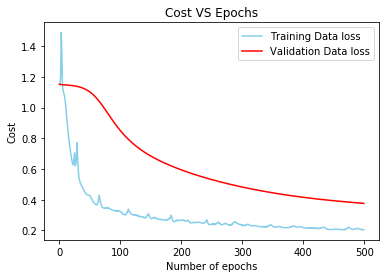

In [16]:
## Learning rate 0.00003 and epochs=800

################################ Training Data ########################################################
Y_predicted,Final_W1,Final_W2=model_function(X_train,Y_hotenc_train,500,0.00003,input_size,hidden_size)
accucheck=accuracy_check(Y_predicted,Y_train)
print("Accuracy with training data is: ",accucheck,"\n")
plt.title('Cost VS Epochs')
plt.xlabel('Number of epochs')
plt.ylabel('Cost')
plt.plot(losstrack,color='skyblue',label = "Training Data loss")
###############################Validation data###########################################
Y_predicted,Final_W1,Final_W2=model_function(X_val,Y_hotenc_val,500,0.00003,input_size,hidden_size)
accucheck=accuracy_check(Y_predicted,Y_val)
print("Accuracy with validation data is: ",accucheck,"\n\n")
predicted_Y_val=(predict_function(X_val))
plt.plot(losstrack,color='red',label = "Validation Data loss")
plt.legend()

In [17]:
################################ Test Data ########################################################
#Y_predicted,Dummy_W1,Dummy_W2=model_function(X_test,Y_hotenc_test,1,0.00001,input_size,hidden_size)

z1 = np.dot(X_test, Final_W1)
a1 = sigmoid(z1)
z2 = np.dot(a1,Final_W2)
a2=softmax(z2)

Y_predicted=predict_function(a2)

accucheck=accuracy_check(Y_predicted,Y_test)
print("Accuracy with test data is: ",accucheck*100,"%")

Accuracy with test data is:  74.08 %


In [18]:
confusion_matrix(Y_test,Y_predicted)

array([[386,   3,   4,  68,   1,   4,  23,   0,   8,   0],
       [  3, 450,   6,  29,   4,   0,   1,   0,   0,   0],
       [  9,   1, 295,   7, 119,   2,  59,   0,   7,   0],
       [ 20,   8,   0, 434,   5,   0,  21,   0,   2,   0],
       [  0,   1, 104,  60, 301,   1,  22,   0,   6,   0],
       [  0,   0,   0,   1,   0, 377,   0,  71,   3,  25],
       [106,   1, 120,  52, 119,   8,  84,   0,  19,   0],
       [  0,   0,   0,   0,   0,  45,   0, 438,   0,  29],
       [  0,   0,   9,  12,   0,  13,   5,   5, 447,   0],
       [  0,   0,   0,   1,   0,   9,   0,  34,   1, 492]])

In [19]:
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(Y_test, Y_predicted,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.74      0.78      0.76       497
     class 1       0.97      0.91      0.94       493
     class 2       0.55      0.59      0.57       499
     class 3       0.65      0.89      0.75       490
     class 4       0.55      0.61      0.58       495
     class 5       0.82      0.79      0.81       477
     class 6       0.39      0.17      0.23       509
     class 7       0.80      0.86      0.83       512
     class 8       0.91      0.91      0.91       491
     class 9       0.90      0.92      0.91       537

    accuracy                           0.74      5000
   macro avg       0.73      0.74      0.73      5000
weighted avg       0.73      0.74      0.73      5000

